# SQL Project

In [1]:
import pandas as pd
import sqlite3

path = 'mental_health.sqlite'
database = path

In [2]:
conn = sqlite3.connect(database)

In [3]:
tables = pd.read_sql("""SELECT * FROM sqlite_master WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,Answer,Answer,2,"CREATE TABLE ""Answer"" (\n\t""AnswerText"" VARCHA..."
1,table,Question,Question,1434,"CREATE TABLE ""Question"" (\n\t""questiontext"" VA..."
2,table,Survey,Survey,1438,"CREATE TABLE ""Survey"" (\n\t""SurveyID"" INTEGER ..."


In [4]:
answers = pd.read_sql("""SELECT * FROM ANSWER;""", conn)
answers

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
236893,Other,2016,2689,117
236894,Support,2016,2690,117
236895,Back-end Developer,2016,2691,117
236896,DevOps/SysAdmin,2016,2692,117


In [5]:
questions = pd.read_sql("""SELECT * FROM QUESTION;""", conn)
questions 

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5
...,...,...
100,Do you think that team members/co-workers woul...,114
101,"If yes, what condition(s) have you been diagno...",115
102,"If maybe, what condition(s) do you believe you...",116
103,Which of the following best describes your wor...,117


In [6]:
survey = pd.read_sql("""SELECT * FROM SURVEY;""", conn)
survey

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [7]:
query = pd.read_sql("""SELECT q.questionid AS QID,
                     q.questiontext AS QTEXT,
                     a.AnswerText AS The_Answer
                    FROM QUESTION q
                    JOIN ANSWER a ON q.questionid = a.QuestionID
                    WHERE q.questionid = 1""", conn)
query

,QID,QTEXT,The_Answer
0,1,What is your age?,37
1,1,What is your age?,44
2,1,What is your age?,32
3,1,What is your age?,31
4,1,What is your age?,31
...,...,...,...
4213,1,What is your age?,27
4214,1,What is your age?,48
4215,1,What is your age?,50
4216,1,What is your age?,30


In the cell below it indicates that there is no null values in the Answer Table.

In [8]:
query = pd.read_sql("""SELECT * FROM ANSWER WHERE AnswerText IS NULL""", conn)
query

,AnswerText,SurveyID,UserID,QuestionID


In [9]:
query = pd.read_sql("""SELECT QuestionID,COUNT(QuestionID) FROM ANSWER GROUP BY QuestionID""", conn)
query

,QuestionID,COUNT(QuestionID)
0,1,4218
1,2,4218
2,3,4218
3,4,4218
4,5,4218
...,...,...
100,114,1433
101,115,2072
102,116,1793
103,117,2692


We noticed that there is a mismatching with questionID and the number of the rows where it supposed to be the 105 questionIDs from 1 to 105, and the change comes from 34 and jumped to 48

In [10]:
query = pd.read_sql("""SELECT s.SurveyID,
                              COUNT(DISTINCT(a.QuestionID)) 
                    FROM Survey s
                    JOIN ANSWER a ON a.SurveyID = s.SurveyID
                    GROUP BY a.SurveyID""", conn)
query

,SurveyID,COUNT(DISTINCT(a.QuestionID))
0,2014,26
1,2016,60
2,2017,76
3,2018,76
4,2019,76


In 2014 there are less questions due to some reason

In [11]:
query = pd.read_sql("""SELECT DISTINCT(q.questionid),q.questiontext
                    FROM QUESTION q
                    JOIN ANSWER a ON q.questionid = a.QuestionID
                    WHERE a.SurveyID = 2014""", conn)
query

,questionid,questiontext
0,1,What is your age?
1,2,What is your gender?
2,3,What country do you live in?
3,4,"If you live in the United States, which state ..."
4,5,Are you self-employed?
5,6,Do you have a family history of mental illness?
6,7,Have you ever sought treatment for a mental he...
7,8,How many employees does your company or organi...
8,9,Is your employer primarily a tech company/orga...
9,10,Does your employer provide mental health benef...


In [12]:
query = pd.read_sql("""SELECT AnswerText FROM ANSWER WHERE SurveyID = 2014 AND QuestionID = 1""", conn)
query['AnswerText'].astype('Int32').mean()

32.13492063492063

In [13]:
survey14 = pd.read_sql("""SELECT a.UserID AS "User ID",
                              q.questionid AS "Question ID",
                              q.questiontext AS "Question",
                              a.AnswerText AS "Answer"
                       FROM ANSWER a 
                       JOIN QUESTION q ON q.questionid = a.QuestionID
                       WHERE a.SurveyID = 2014
                       """, conn)
survey14

,User ID,Question ID,Question,Answer
0,1,1,What is your age?,37
1,2,1,What is your age?,44
2,3,1,What is your age?,32
3,4,1,What is your age?,31
4,5,1,What is your age?,31
...,...,...,...,...
32755,1256,103,Any additional notes or comments,-1
32756,1257,103,Any additional notes or comments,-1
32757,1258,103,Any additional notes or comments,-1
32758,1259,103,Any additional notes or comments,-1


In [14]:
pd.set_option('display.max_colwidth', 100)

In [15]:
mode_values = survey14.groupby('Question')['Answer'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
mode_values = mode_values.reset_index()

mode_values.columns = ['Question', 'Most frquent Answer']

mode_values.sort_values(by='Question')

,Question,Most frquent Answer
0,Any additional notes or comments,-1
1,Are you self-employed?,0
2,Do you feel that your employer takes mental health as seriously as physical health?,Don't know
3,Do you have a family history of mental illness?,No
4,Do you know the options for mental health care your employer provides?,No
5,Do you think that discussing a mental health issue with your employer would have negative conseq...,No
6,Do you think that discussing a physical health issue with your employer would have negative cons...,No
7,Do you work remotely (outside of an office) at least 50% of the time?,No
8,Does your employer provide mental health benefits as part of healthcare coverage?,Yes
9,Does your employer provide resources to learn more about mental health issues and how to seek help?,No


there is something odd about this dataset, How come the most frequent answer to the question "What country do you live in?" is United States, and the question "If you live in the United States, which state or territory do you live in?" is -1?

so we dive in to know the actual answer

In [49]:
# How to count the values within a single column using sql?

query = pd.read_sql("""SELECT Answer,COUNT(Answer) AS frequency
                    FROM (SELECT a.UserID AS "User  ID",
                    q.questionid AS "Question ID",
                    q.questiontext AS "Question",
                    a.AnswerText AS "Answer"
                FROM ANSWER a 
                JOIN QUESTION q ON q.questionid = a.QuestionID
                WHERE a.SurveyID = 2014
                        ) AS AnswerData WHERE "Question ID" = 4
                    GROUP BY Answer
                    ORDER BY frequency DESC""", conn)
query

,Answer,frequency
0,-1,516
1,California,138
2,Washington,70
3,New York,57
4,Tennessee,45
5,Texas,44
6,Ohio,30
7,Pennsylvania,29
8,Oregon,29
9,Illinois,29


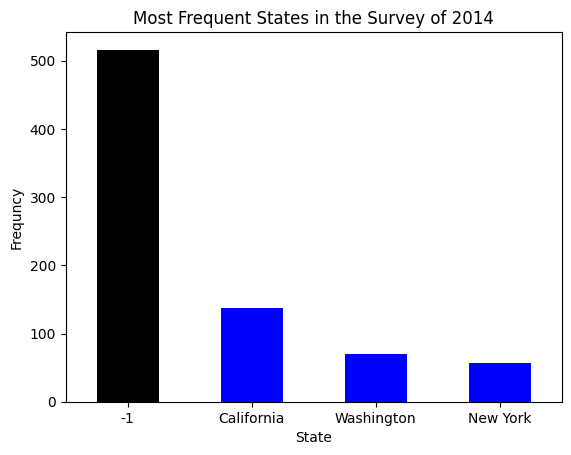

In [48]:
import matplotlib.pyplot as plt
query[0:4].plot(kind='bar', x='Answer', y='frequency', color=['black', 'blue','blue','blue'], legend=False)

plt.title('Most Frequent States in the Survey of 2014')
plt.xlabel('State')
plt.ylabel('Frequncy')
plt.xticks(rotation=0)
plt.show()

so from the above query we noticed that California is actually the most frequent state that this survey placed on

ok lets dive into this question "If you have a mental health condition, do you feel that it interferes with your work?" 
and plot the result

In [50]:
query = pd.read_sql("""SELECT a.UserID AS "User ID",
                              q.questionid AS "Question ID",
                              q.questiontext AS "Question",
                              a.AnswerText AS "Answer"
                       FROM ANSWER a 
                       JOIN QUESTION q ON q.questionid = a.QuestionID
                       WHERE a.SurveyID = 2014 AND q.questionid = 92""", conn)
query

,User ID,Question ID,Question,Answer
0,1,92,"If you have a mental health condition, do you feel that it interferes with your work?",Often
1,2,92,"If you have a mental health condition, do you feel that it interferes with your work?",Rarely
2,3,92,"If you have a mental health condition, do you feel that it interferes with your work?",Rarely
3,4,92,"If you have a mental health condition, do you feel that it interferes with your work?",Often
4,5,92,"If you have a mental health condition, do you feel that it interferes with your work?",Never
...,...,...,...,...
1255,1256,92,"If you have a mental health condition, do you feel that it interferes with your work?",Often
1256,1257,92,"If you have a mental health condition, do you feel that it interferes with your work?",Sometimes
1257,1258,92,"If you have a mental health condition, do you feel that it interferes with your work?",-1
1258,1259,92,"If you have a mental health condition, do you feel that it interferes with your work?",Sometimes


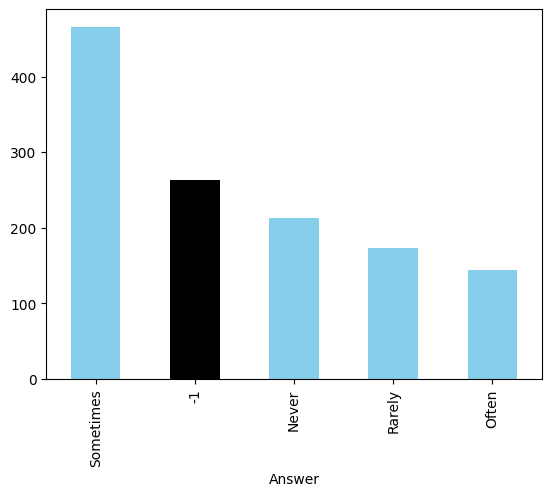

In [56]:
query['Answer'].value_counts().plot(kind='bar', color=['skyblue','black','skyblue','skyblue','skyblue'])
plt.show()

so most people said 'Sometimes', ok then.

let's see this query about question "Have you heard of or observed negative consequences for coworkers with mental health conditions?"

In [57]:
query = pd.read_sql("""SELECT a.UserID AS "User ID",
                              q.questionid AS "Question ID",
                              q.questiontext AS "Question",
                              a.AnswerText AS "Answer"
                       FROM ANSWER a 
                       JOIN QUESTION q ON q.questionid = a.QuestionID
                       WHERE a.SurveyID = 2014 AND q.questionid = 102""",conn)
query

,User ID,Question ID,Question,Answer
0,1,102,Have you heard of or observed negative consequences for coworkers with mental health conditions ...,No
1,2,102,Have you heard of or observed negative consequences for coworkers with mental health conditions ...,No
2,3,102,Have you heard of or observed negative consequences for coworkers with mental health conditions ...,No
3,4,102,Have you heard of or observed negative consequences for coworkers with mental health conditions ...,Yes
4,5,102,Have you heard of or observed negative consequences for coworkers with mental health conditions ...,No
...,...,...,...,...
1255,1256,102,Have you heard of or observed negative consequences for coworkers with mental health conditions ...,No
1256,1257,102,Have you heard of or observed negative consequences for coworkers with mental health conditions ...,No
1257,1258,102,Have you heard of or observed negative consequences for coworkers with mental health conditions ...,No
1258,1259,102,Have you heard of or observed negative consequences for coworkers with mental health conditions ...,No


<Axes: xlabel='Answer'>

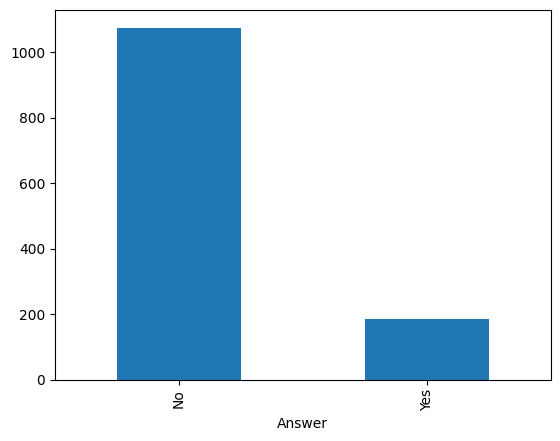

In [58]:
query['Answer'].value_counts().plot(kind='bar')

as we noticed here, most people said 'No', that means that most people don't know actually how a serious mental health condition affect the perofromance of the workers, hence that people answerd the question about themselves "If you have a mental health condition, do you feel that it interferes with your work?" most of them said 'Sometimes'!!
So, the answer is that most people don't know how a serious mental health condition could affect a person